# Pymaceuticals Inc.
---

### Analysis

- Pymaceuticals drug of interest, Capomulin, performed very well in this study on the effects of 10 different drug regimens on the size of tumors caused by Squamous Cell Carcinoma(skin cancer). Mice were seperated into 10 groups and each group was given a different drug regimen for 45 days. During the 45 days the tumors on the mice were measured to determine each drug regimen's effectiveness in reducing tumor size. 
- The Summary Statistics tables below show the mean and median tumor volumes for each drug along with the variance, standard deviation and standard error of measurement. Measurements of these tumors were taken in cubic millimeters(mm3). Capomulin's average tumor volume, at 40.68 (mm3), was only beaten by Ramicane, which had an average of 40.22 (mm3). The other 8 drug regimens were far behind with the next closest size after Capomulin being over 11 (mm3) larger. From these numbers, Capomulin indicates that it has a desirable effect on tumor size. Capomulin's variance, standard deviation, and standard error of measurement are all much smaller than the 8 less effective drug regimens. This indicates more consistency and reliability in Capomulin's results.
- The number of observed timepoints for each drug regimen are represented in a bar chart. Capomulin had the most observed timepoints at 230, followed closely by Ramicane at 228. The next drug regimen had 30 less timepoints and the numbers went down from there. This indicates that as the study went on, there were more mice still alive in the Capomulin group than in any other group. Another indicator of Capomulin's effectiveness.
- There was an even mix of male and female mice with only 2 more males out of 248 total mice. Two pie charts show this as a percentage.
- Capomulin and 3 other drug regimens were selected to determine potential outliers and are shown in a box plot. The chart shows that Capomulin had a tighter distribution of tumor volumes than the other drugs, indicating consistency.
 

In [40]:
%matplotlib notebook
%matplotlib ipympl



In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = study_results.merge(mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [42]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index, inplace=False)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [46]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

In [74]:
clock = [0, 5, 10, 15, 20, 25, 30, 35, 40]
cleaned_data.value_counts('Timepoint')


Timepoint
0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: count, dtype: int64

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
dreg_mean = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
dreg_median = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
dreg_variance = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
dreg_std = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
dreg_sem = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_drug_regimen = pd.DataFrame({'Mean Tumor Volume': dreg_mean, 'Median Tumor Volume': dreg_median,
                                      'Tumor Volume Variance': dreg_variance, 'Tumor Volume Std. Dev.': dreg_std,
                                      'Tumor Volume Std. Err.': dreg_sem})

summary_drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

summary_stats.style.set_caption("Tumor Volume (mm3)")


,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [75]:
mice_per_drug = cleaned_data.groupby(['Drug Regimen', 'Timepoint']).size().reset_index(name='Counts')
points_per_drug = mice_per_drug.groupby('Drug Regimen')['Counts'].sum().reset_index()
sorted_points_per_drug = points_per_drug.sort_values(by='Counts', ascending=False)
sorted_points_per_drug

,Drug Regimen,Counts
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


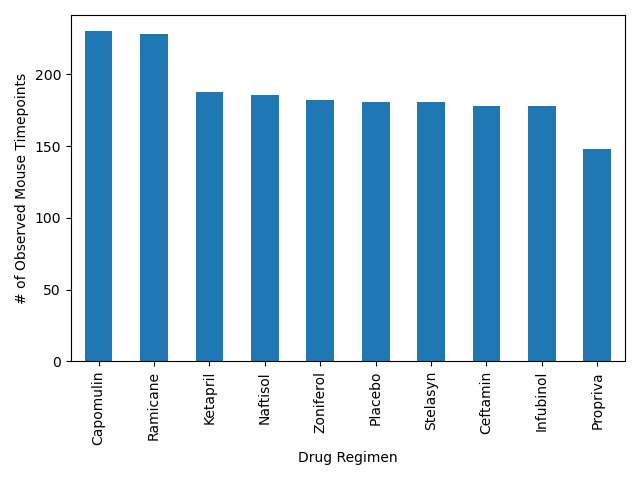

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_plot = sorted_points_per_drug.plot(x='Drug Regimen', y= 'Counts', kind='bar', 
                            xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', legend=False)
plt.tight_layout()
plt.show()

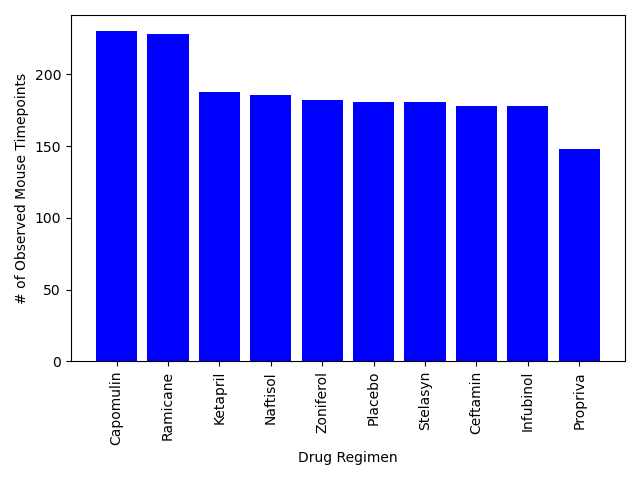

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure()
regimen = sorted_points_per_drug['Drug Regimen']
points = sorted_points_per_drug['Counts']
plt.bar(regimen, points, align='center', color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

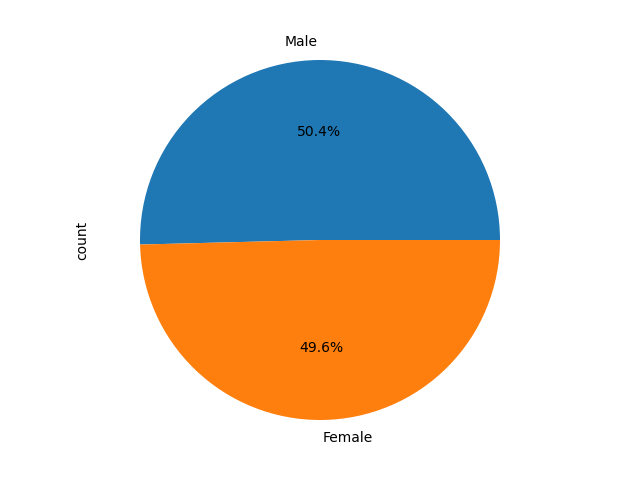

In [31]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_dispersal = cleaned_data.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

# Make the pie chart
counts = gender_dispersal.Sex.value_counts()
plt.figure()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.tight_layout()
plt.show()

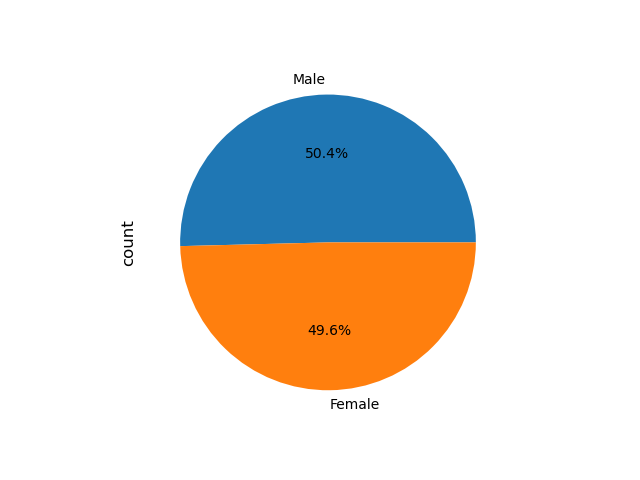

In [32]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_labels = ['Male', 'Female']
fig, ax = plt.subplots()
plt.pie(counts, labels=gender_labels, autopct="%1.1f%%")
ax.text(-1.4, 0, 'count', rotation=90, fontsize=12, va='center')
plt.show()


## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_time.rename(columns={'Timepoint': 'Last Timepoint'}, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = combined_data.merge(last_time, on='Mouse ID')
final_volume = final_volume[final_volume['Timepoint'] == final_volume['Last Timepoint']]
four_final_volume = final_volume[final_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
four_final_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
180,u153,0,45.000000,0,Ceftamin,Female,11,25,0
192,b447,0,45.000000,0,Ceftamin,Male,2,30,0
215,x226,0,45.000000,0,Ceftamin,Male,23,28,0
220,t573,0,45.000000,0,Ceftamin,Female,15,27,0
416,c326,5,36.321346,0,Infubinol,Female,18,25,5


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for t in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = four_final_volume[four_final_volume['Drug Regimen'] == t]['Tumor Volume (mm3)']

    # add subset
    tumor_vol.append(subset)
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    print(f"{t}'s potential outliers: {subset[(subset < lower_bound) | (subset > upper_bound)]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 416    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


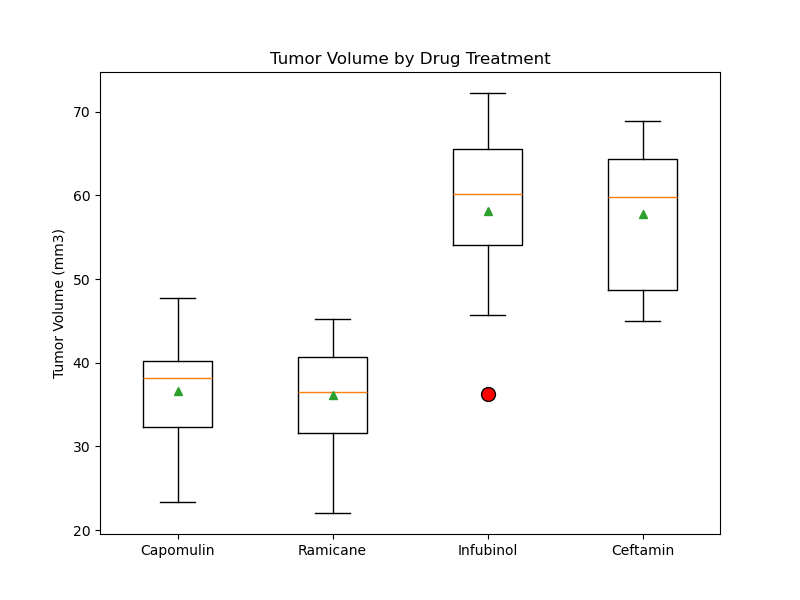

In [35]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(tumor_vol, tick_labels=treatments, showmeans=True, flierprops=dict(markerfacecolor='red', markersize=10))
ax.set_title('Tumor Volume by Drug Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

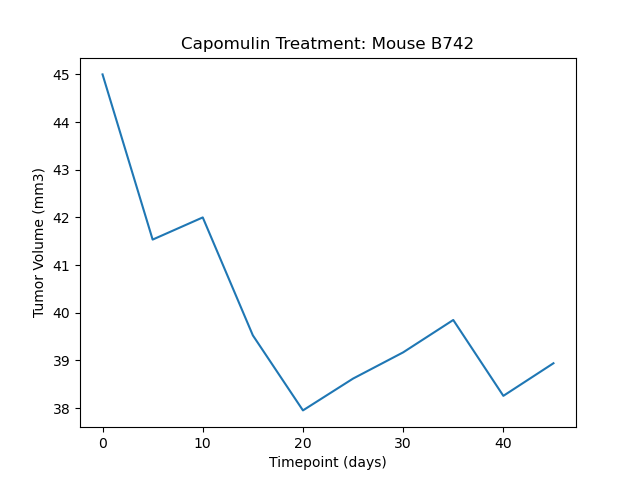

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin Mouse ID: b742
cap_mouse = cleaned_data.loc[cleaned_data['Mouse ID'] == 'b742']
x_values = cap_mouse['Timepoint']
y_values = cap_mouse['Tumor Volume (mm3)']
plt.figure()
plt.plot(x_values, y_values)
plt.title('Capomulin Treatment: Mouse B742')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

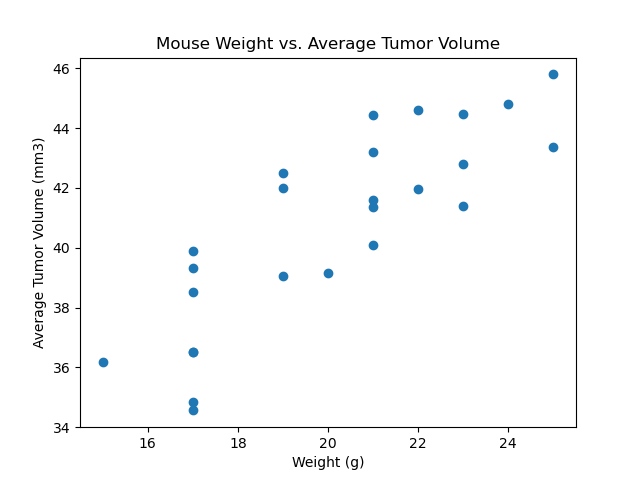

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_mice = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
mice = cap_mice['Mouse ID'].unique()
mouse_weight = []
avg_tumor_volume = []

for m in mice:
    mouse_data = cap_mice[cap_mice['Mouse ID'] == m]
    avg_tumor_volume.append(mouse_data['Tumor Volume (mm3)'].mean())
    mouse_weight.append(mouse_data['Weight (g)'].unique()[0])

plt.figure()
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse wight and the average tumor volume is 0.84


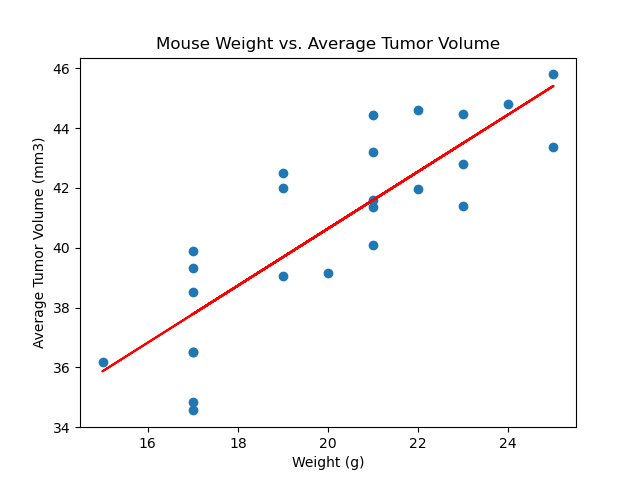

In [45]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_mouse_data = pd.DataFrame({'Mouse ID': mice, 'Weight (g)': mouse_weight, 'Average Tumor Volume': avg_tumor_volume})
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
avt = round(correlation[0], 2)

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse wight and the average tumor volume is {avt}")
plt.figure()
plt.scatter(mouse_weight, avg_tumor_volume)
regression_line = slope * pd.Series(mouse_weight) + intercept
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

